In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\katar\Desktop\Plants\ElectricityProductionPlant.csv")

In [4]:
df.head()

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y
0,14727,Schlossstrasse 15,4147,Aesch BL,BL,2009-05-05,14.65,18.81,maincat_2,subcat_2,plantcat_9,2611936.0,1257011.0
1,14728,Ob der Steig 1,5082,Kaisten,AG,2011-10-28,5.80,5.80,maincat_2,subcat_2,plantcat_8,2645758.0,1265094.0
2,10164,Gässli 4,3114,Wichtrach,BE,2008-10-07,3.00,3.00,maincat_2,subcat_2,plantcat_8,2610547.0,1188979.0
3,10794,Diemtigtalstrasse 46,3753,Oey,BE,2008-06-27,8.40,8.40,maincat_2,subcat_2,plantcat_8,2610529.0,1167346.0
4,9476,Holzweidstrasse 8,8340,Hinwil,ZH,2006-04-21,4.80,4.80,maincat_2,subcat_2,plantcat_8,2705863.0,1240553.0


In [5]:
df = df.drop(columns=['_x', '_y' ])

In [6]:
df_plants = pd.read_csv(r"C:\Users\katar\Desktop\Plants\PlantCategoryCatalogue.csv")

In [7]:
df_plants = df_plants.drop(columns=['de', 'fr', 'it'])


In [8]:
df_plants.head()

,Catalogue_id,en
0,plantcat_1,Wastewater power plant
1,plantcat_2,Diversion power plant
2,plantcat_3,Weir plant
3,plantcat_4,Continuous power plant
4,plantcat_5,Drinking water power plant


In [9]:
df_merged = df.merge(df_plants, how='left', left_on='PlantCategory', right_on='Catalogue_id') 

In [10]:
df_merged.tail(5)

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,Catalogue_id,en
308383,27695,Chasura,7559,Tschlin,GR,1994-11-07,300.0,300.0,maincat_1,subcat_1,plantcat_5,plantcat_5,Drinking water power plant
308384,27716,Runcà,7535,Valchava,GR,2001-11-21,28.0,28.0,maincat_1,subcat_1,plantcat_5,plantcat_5,Drinking water power plant
308385,30055,Stapfackerweg 992E,3805,Goldswil b. Interlaken,BE,1998-01-01,10.0,10.0,maincat_2,subcat_2,NaN,NaN,NaN
308386,30065,Breitenberg,3858,Hofstetten b. Brienz,BE,1994-08-26,26.0,26.0,maincat_1,subcat_1,plantcat_5,plantcat_5,Drinking water power plant
308387,10231,(Lioson-Dessous) Les Fontaines-Goupe 3,1862,Les Mosses,VD,1990-01-01,40.0,40.0,maincat_1,subcat_1,plantcat_5,plantcat_5,Drinking water power plant


In [11]:
df_sub = pd.read_csv(r"C:\Users\katar\Desktop\Plants\SubCategoryCatalogue.csv")

In [12]:
df_sub = df_sub.drop(columns=['de', 'fr', 'it'])

In [13]:
df_sub.head()

,Catalogue_id,en
0,subcat_1,Hydroelectric power
1,subcat_2,Photovoltaic
2,subcat_3,Wind energy
3,subcat_4,Biomass
4,subcat_5,Geothermal energy


In [14]:
df_merged2 = df_merged.merge(df_sub, how='left', left_on='SubCategory', right_on='Catalogue_id')

In [15]:
df_merged2.head()

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,Catalogue_id_x,en_x,Catalogue_id_y,en_y
0,14727,Schlossstrasse 15,4147,Aesch BL,BL,2009-05-05,14.65,18.81,maincat_2,subcat_2,plantcat_9,plantcat_9,Integrated,subcat_2,Photovoltaic
1,14728,Ob der Steig 1,5082,Kaisten,AG,2011-10-28,5.80,5.80,maincat_2,subcat_2,plantcat_8,plantcat_8,Attached,subcat_2,Photovoltaic
2,10164,Gässli 4,3114,Wichtrach,BE,2008-10-07,3.00,3.00,maincat_2,subcat_2,plantcat_8,plantcat_8,Attached,subcat_2,Photovoltaic
3,10794,Diemtigtalstrasse 46,3753,Oey,BE,2008-06-27,8.40,8.40,maincat_2,subcat_2,plantcat_8,plantcat_8,Attached,subcat_2,Photovoltaic
4,9476,Holzweidstrasse 8,8340,Hinwil,ZH,2006-04-21,4.80,4.80,maincat_2,subcat_2,plantcat_8,plantcat_8,Attached,subcat_2,Photovoltaic


In [16]:
df_merged2 = df_merged2.drop(columns=['MainCategory', 'SubCategory', 'PlantCategory', 'Catalogue_id_x', 'Catalogue_id_y'])

In [17]:
df_merged2 = df_merged2.rename(columns={'en_x': 'PlantType','en_y': 'PlantCategory' })

In [18]:
df_merged2.shape

(308388, 10)

In [19]:
df_merged2[df_merged2.isnull().any(axis=1)]

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,PlantType,PlantCategory
12,13179,Passo San Gottardo,6780,Airolo,TI,2020-10-19,2550.00,2550.00,NaN,Wind energy
18,13171,Passo San Gottardo,6780,Airolo,TI,2020-11-16,2550.00,2550.00,NaN,Wind energy
26,13159,Passo San Gottardo,6777,Quinto,TI,2020-11-23,2550.00,2550.00,NaN,Wind energy
38,9453,Courtis-Neufs néant,1920,Martigny,VS,2008-05-01,2000.00,2000.00,NaN,Wind energy
41,13582,Passo San Gottardo,6780,Airolo,TI,2020-10-29,2550.00,2550.00,NaN,Wind energy
...,...,...,...,...,...,...,...,...,...,...
308367,11987,Entschwil 810D,3755,Horboden,BE,1995-01-01,3.00,3.00,NaN,Photovoltaic
308368,11998,Obere Steinweide 185,3713,Reichenbach im Kandertal,BE,2004-01-01,3.00,3.00,NaN,Photovoltaic
308369,12336,Mättiwil,6005,St. Niklausen LU,LU,1995-10-01,52.09,52.09,NaN,Photovoltaic
308370,12543,Seetalstrasse 13A,6032,Emmen,LU,2002-03-01,1.50,1.50,NaN,Photovoltaic


In [20]:
df_merged2.Canton.nunique()

26

In [21]:
df_merged2[df_merged2['Canton'] == "ZH"]

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,PlantType,PlantCategory
4,9476,Holzweidstrasse 8,8340,Hinwil,ZH,2006-04-21,4.8,4.8,Attached,Photovoltaic
5,14729,Lärchentobelstrasse 33,8700,Küsnacht,ZH,2010-11-04,21.8,21.8,Integrated,Photovoltaic
10,14748,Schottikerstrasse 26,8352,Elsau,ZH,2011-11-22,2.6,2.6,Attached,Photovoltaic
19,14765,Sulzbergstrasse 4,8330,Pfäffikon ZH,ZH,2009-10-26,5.0,5.0,Attached,Photovoltaic
22,14768,Im Chrummenacher 6,8308,Illnau,ZH,2010-11-16,5.7,5.7,Attached,Photovoltaic
...,...,...,...,...,...,...,...,...,...,...
308298,9066,Ober Hamberg 155,8495,Schmidrüti,ZH,2003-11-01,4.0,4.0,NaN,Photovoltaic
308299,9069,Käppeliweg,8488,Turbenthal,ZH,2004-06-08,31.0,31.0,NaN,Photovoltaic
308300,8983,Alte Steinacherstrasse 1598,8804,Au ZH,ZH,2001-07-01,4.2,4.2,NaN,Photovoltaic
308301,8987,Boden 73,8494,Bauma,ZH,2005-09-06,3.0,3.0,NaN,Photovoltaic


In [22]:
df_merged2[df_merged2["TotalPower"] >= 30]

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,PlantType,PlantCategory
9,14747,Hofbergstrasse 21,9500,Wil,SG,2011-12-16,50.90,50.90,Integrated,Photovoltaic
12,13179,Passo San Gottardo,6780,Airolo,TI,2020-10-19,2550.00,2550.00,NaN,Wind energy
14,11795,Via Industria 1,6934,Bioggio,TI,2009-08-17,124.16,1541.04,Attached,Photovoltaic
18,13171,Passo San Gottardo,6780,Airolo,TI,2020-11-16,2550.00,2550.00,NaN,Wind energy
26,13159,Passo San Gottardo,6777,Quinto,TI,2020-11-23,2550.00,2550.00,NaN,Wind energy
...,...,...,...,...,...,...,...,...,...,...
308380,27665,Furmiers,7550,Scuol,GR,1991-04-13,112.00,112.00,Drinking water power plant,Hydroelectric power
308381,27675,Giarsun,7545,Guarda,GR,1998-01-22,350.00,350.00,Diversion power plant,Hydroelectric power
308382,27685,Charal,7545,Guarda,GR,1991-02-20,182.00,182.00,Drinking water power plant,Hydroelectric power
308383,27695,Chasura,7559,Tschlin,GR,1994-11-07,300.00,300.00,Drinking water power plant,Hydroelectric power


In [23]:
df_merged2['BeginningOfOperation'] = pd.to_datetime(df_merged2['BeginningOfOperation'],format='%Y-%m-%d').copy()

In [24]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308388 entries, 0 to 308387
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   xtf_id                308388 non-null  int64         
 1   Address               308388 non-null  object        
 2   PostCode              308388 non-null  int64         
 3   Municipality          308388 non-null  object        
 4   Canton                308388 non-null  object        
 5   BeginningOfOperation  308388 non-null  datetime64[ns]
 6   InitialPower          308388 non-null  float64       
 7   TotalPower            308388 non-null  float64       
 8   PlantType             303471 non-null  object        
 9   PlantCategory         308388 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 23.5+ MB


In [25]:
df_merged2[df_merged2['BeginningOfOperation'] >= '2015-01-01']

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,PlantType,PlantCategory
12,13179,Passo San Gottardo,6780,Airolo,TI,2020-10-19,2550.00,2550.00,NaN,Wind energy
18,13171,Passo San Gottardo,6780,Airolo,TI,2020-11-16,2550.00,2550.00,NaN,Wind energy
26,13159,Passo San Gottardo,6777,Quinto,TI,2020-11-23,2550.00,2550.00,NaN,Wind energy
41,13582,Passo San Gottardo,6780,Airolo,TI,2020-10-29,2550.00,2550.00,NaN,Wind energy
43,13578,Passo San Gottardo,6780,Airolo,TI,2020-10-08,2550.00,2550.00,NaN,Wind energy
...,...,...,...,...,...,...,...,...,...,...
308119,264248,Domleschgerstrasse 78,7417,Paspels,GR,2021-07-27,55.00,55.00,NaN,Photovoltaic
308120,264310,Töbali 5,7428,Tschappina,GR,2020-11-09,16.00,16.00,NaN,Photovoltaic
308121,264314,Alte Muttnerstrasse 2 1,7431,Mutten,GR,2022-11-25,30.00,30.00,NaN,Photovoltaic
308130,283532,Robert-Stephenson-Weg 47,8000,Zürich,ZH,2015-03-12,23.54,23.54,NaN,Photovoltaic


In [26]:
df_merged2['Year']= df_merged2.BeginningOfOperation.dt.year

In [27]:
df_merged2['totalpower_mw'] = round(df_merged2['TotalPower'] / 1000, 2)

In [28]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308388 entries, 0 to 308387
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   xtf_id                308388 non-null  int64         
 1   Address               308388 non-null  object        
 2   PostCode              308388 non-null  int64         
 3   Municipality          308388 non-null  object        
 4   Canton                308388 non-null  object        
 5   BeginningOfOperation  308388 non-null  datetime64[ns]
 6   InitialPower          308388 non-null  float64       
 7   TotalPower            308388 non-null  float64       
 8   PlantType             303471 non-null  object        
 9   PlantCategory         308388 non-null  object        
 10  Year                  308388 non-null  int32         
 11  totalpower_mw         308388 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), obje

In [29]:
df_merged2['LargePlant'] = np.where(df_merged2['totalpower_mw'] > 50, 'Yes', "No")

In [30]:
#How many large plants are there?

df_merged2[df_merged2["LargePlant"] == 'Yes']

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,PlantType,PlantCategory,Year,totalpower_mw,LargePlant
302564,5816,Rütigasse 3,8754,Netstal,GL,1908-07-01,60000.0,60000.0,Storage power plant,Hydroelectric power,1908,60.00,Yes
302572,5741,Vasönerstrasse,7314,Vadura,SG,1977-03-14,366000.0,366000.0,Pumped storage power plant,Hydroelectric power,1977,366.00,Yes
302576,5727,Via Principale 16,7744,Campocologno,GR,1907-03-01,55000.0,55000.0,Storage power plant,Hydroelectric power,1907,55.00,Yes
302577,6059,-,7132,Vals,GR,1957-11-01,232000.0,232000.0,Pumped storage power plant,Hydroelectric power,1957,232.00,Yes
302586,5904,Zentrale,3922,Stalden,VS,1959-01-01,57600.0,57600.0,Diversion power plant,Hydroelectric power,1959,57.60,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307947,75248,-,5325,Leibstadt,AG,1933-01-01,84000.0,84000.0,Diversion power plant,Hydroelectric power,1933,84.00,Yes
307949,77661,Avenue Général-Guisan 2,3960,Sierre,VS,1958-01-01,115900.0,115900.0,Pumped storage power plant,Hydroelectric power,1958,115.90,Yes
307950,77662,Avenue Général Guisan 2,3960,Sierre,VS,2013-02-04,71550.0,71550.0,Pumped storage power plant,Hydroelectric power,2013,71.55,Yes
307962,138259,-,6690,San Carlo,TI,1967-11-01,192200.0,192200.0,Pumped storage power plant,Hydroelectric power,1967,192.20,Yes


<Axes: ylabel='Canton'>

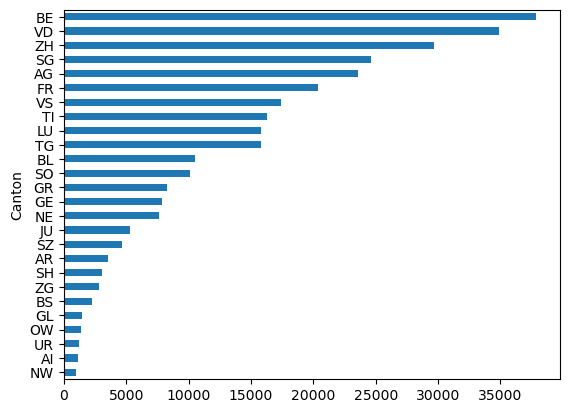

In [31]:
#How many plants exist per Canton?

df_merged2.groupby('Canton')['xtf_id'].count().sort_values(ascending=True).plot.barh()

In [32]:
df_merged2[df_merged2.duplicated()]

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,PlantType,PlantCategory,Year,totalpower_mw,LargePlant


In [33]:
#What is the total installed capacity (MW) per Canton?

df_merged2.groupby('Canton')['totalpower_mw'].sum().sort_values(ascending=False)

Canton
VS    5928.82
AG    3387.72
GR    3126.94
BE    2904.08
TI    1927.12
GL    1751.95
SO    1455.98
VD    1224.36
SG    1197.52
ZH    1034.34
FR     715.96
LU     658.18
TG     509.94
SZ     475.47
UR     396.55
BL     379.87
GE     346.89
NE     286.32
OW     176.39
JU     159.88
ZG     124.78
BS     123.97
SH     113.69
AR      83.08
NW      74.21
AI      32.70
Name: totalpower_mw, dtype: float64

<Axes: xlabel='Canton'>

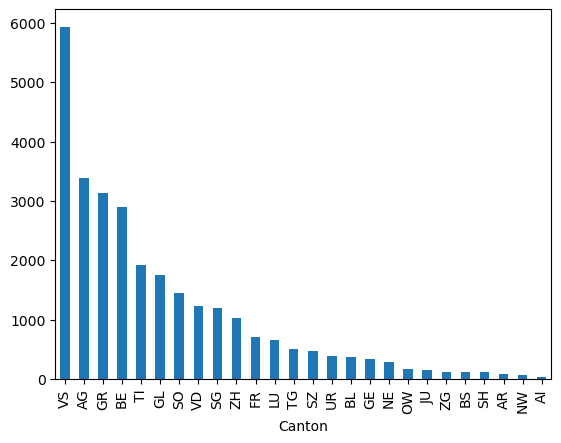

In [34]:
df_merged2.groupby('Canton')['totalpower_mw'].sum().sort_values(ascending=False).plot.bar()

In [35]:
# What is the average capacity by PlantCategory?

df_merged2.groupby('PlantCategory')['totalpower_mw'].mean().sort_values(ascending=False)

PlantCategory
Nuclear energy         753.650000
Waste                   13.324828
Hydroelectric power     11.100193
Natural gas              1.565250
Wind energy              1.472319
Biomass                  0.555685
Photovoltaic             0.025655
Crude oil                0.010000
Name: totalpower_mw, dtype: float64

<Axes: ylabel='PlantCategory'>

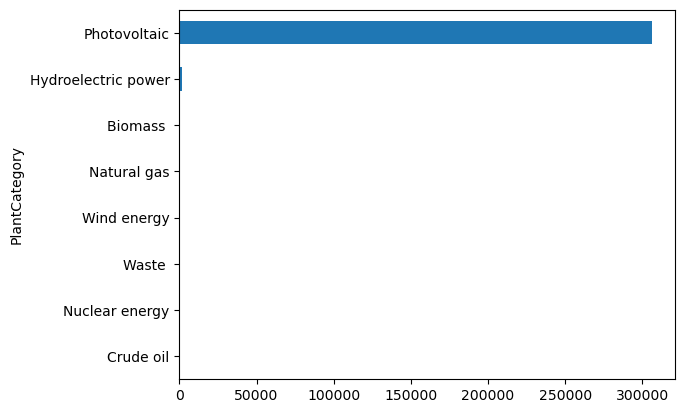

In [36]:
# What is the share of installations by plant category? 

df_merged2.groupby('PlantCategory')['xtf_id'].count().sort_values(ascending=True).plot.barh()


In [ ]:
# Overview how many plants were created

In [37]:
df_graph = df_merged2[['BeginningOfOperation', 'xtf_id']]

In [40]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308388 entries, 0 to 308387
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   BeginningOfOperation  308388 non-null  datetime64[ns]
 1   xtf_id                308388 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7 MB


In [43]:
df_graph = df_merged2.groupby('Year')['xtf_id'].count()

Text(0, 0.5, 'Number of New Plants')

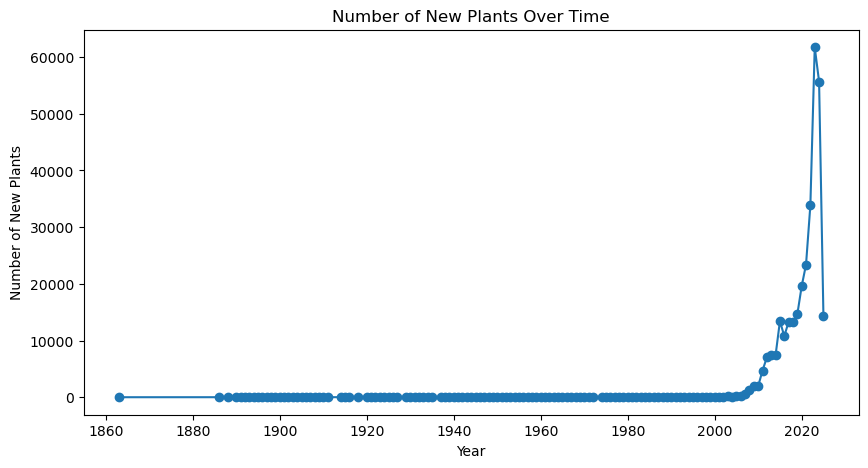

In [46]:
df_graph.plot(kind='line', figsize=(10,5), marker='o')

plt.title("Number of New Plants Over Time")
plt.xlabel("Year")
plt.ylabel("Number of New Plants")

In [ ]:
#Overview of types of plants per canton

df_merged2.pivot_table(index='Canton',
                       columns='PlantCategory',
                       values='TotalPower',
                       aggfunc='sum')

PlantCategory,Biomass,Crude oil,Hydroelectric power,Natural gas,Nuclear energy,Photovoltaic,Waste,Wind energy
Canton,,,,,,,,
AG,18833.6,NaN,676335.20,786.0,1979600.0,679705.20,32510.0,NaN
AI,110.0,NaN,2532.00,780.0,NaN,29291.13,NaN,NaN
AR,1837.0,NaN,2391.00,883.0,NaN,77096.78,NaN,80.0
BE,55335.1,5.3,1704129.00,96760.5,NaN,974677.57,36120.0,37250.0
BL,1917.0,NaN,131055.00,9050.0,NaN,237126.16,NaN,NaN
BS,13215.4,NaN,238.50,32886.0,NaN,60959.45,16214.6,NaN
FR,7363.5,NaN,251063.91,1948.0,NaN,444536.89,10000.0,NaN
GE,1489.0,NaN,163870.00,2923.0,NaN,159999.42,18400.0,NaN
GL,615.0,NaN,1700473.50,478.0,NaN,37698.72,12500.0,NaN
